In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from knn import KNN
from scipy.stats import mode

In [4]:
mnist = sklearn.datasets.load_digits()

In [338]:
X = mnist['data']
y = mnist['target']

In [339]:
X.shape, y.shape

((1797, 64), (1797,))

In [361]:
# subset 1000 as train, 200 as valid
rnd_idx = np.random.permutation(X.shape[0])
trn_idx = rnd_idx[:1000]
val_idx = rnd_idx[1000:1200]

In [374]:
X_trn, y_trn = X[trn_idx], y[trn_idx]
X_val, y_val = X[val_idx], y[val_idx]
print(f'train shape {X_trn.shape}')
print(f'valid shape {X_val.shape}')

train shape (1000, 64)
valid shape (200, 64)


Build and train knn model

In [518]:
knn = KNN()
knn.fit(X_trn, y_trn)
y_pred = knn.predict(X_val, k=1)
print(f'k=1 accuracy {np.sum(y_pred==y_val)/y_pred.shape[0]}')
y_pred = knn.predict(X_val, k=5)
print(f'k=3 accuracy {np.sum(y_pred==y_val)/y_pred.shape[0]}')

k=1 accuracy 0.985
k=3 accuracy 0.98


pred 
 [[0 3 1 0 6]
 [9 2 4 7 1]
 [8 4 2 7 2]
 [8 8 3 8 1]
 [0 5 3 5 4]]
actual 
 [[0 3 1 0 6]
 [9 2 4 7 1]
 [8 4 2 7 2]
 [8 8 3 8 1]
 [0 5 3 5 4]]


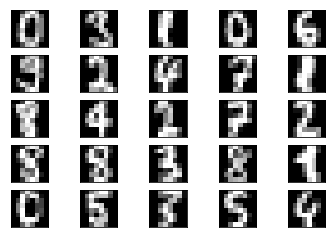

In [511]:
fig, axes = plt.subplots(5, 5)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_val[i].reshape(8, 8), cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
print(f"pred \n {y_pred[:25].reshape(5, 5)}")
print(f"actual \n {y_val[:25].reshape(5, 5)}")


In [512]:
wrong_idx = np.where(y_pred!=y_val)

In [513]:
wrong_idx

(array([ 34,  42,  66, 134]),)

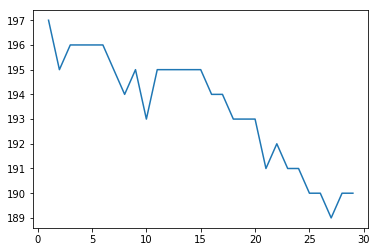

In [546]:
val_preds = [np.sum(y_val==knn.predict(X_val, k=k)) for k in range(1,30)]
plt.plot(np.arange(1,30), val_preds)

In [533]:
np.sum(tst_preds == y[rnd_idx[1400:]])/tst_preds.shape[0]

0.9622166246851386